In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models

D:\Programs\envs\FakeNewsResearch\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:

df= pd.read_parquet(r"C:\Users\brand\UNISA_Honour_Fake_News_Program\Dataset_Merged_BackUp\ForModeling.parquet")
#ForModeling_BagofWords
#ForModeling


#df=df.sample(n=10000,random_state=42)
df.shape

(57722, 1013)

In [4]:
df['label'].value_counts()


label
0.0    32840
1.0    24882
Name: count, dtype: int64

In [5]:
#df=df.drop(columns=['index','text','title','title_processed','text_processed','text_punctuation_frequency','title_punctuation_frequency'
#                       ,'title_capitalization_frequency'])
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57720 entries, 46996 to 15795
Columns: 1013 entries, label to BOW_young
dtypes: float64(9), int32(2), int64(1002)
memory usage: 446.1 MB


In [6]:

y = df['label']

# Select all columns except 'label' for features
X = df.drop(columns=['label'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train_own_features=X_train.iloc[:, :-1000]
X_test_own_features=X_test.iloc[:, :-1000]


# Example: Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_knn = scaler.fit_transform(X_train_own_features)
X_test_knn = scaler.transform(X_test_own_features)




In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X.shape)
#print(X_train.value_counts())
#print(X_test.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())



(40404, 1012)
(17316, 1012)
(40404,)
(17316,)
(57720, 1012)
label
0.0    22960
1.0    17444
Name: count, dtype: int64
label
0.0    9880
1.0    7436
Name: count, dtype: int64


In [8]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),  # Add batch normalization
    layers.Dropout(0.5),  # Add dropout
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),  # Add batch normalization
    layers.Dropout(0.5),  # Add dropout
    layers.Dense(1, activation='sigmoid')  # Binary classification, so one output neuron with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
model.summary()

Epoch 1/25
506/506 [==============================] - 2s 3ms/step - loss: 0.3284 - accuracy: 0.8616 - val_loss: 0.1869 - val_accuracy: 0.9260
Epoch 2/25
506/506 [==============================] - 1s 3ms/step - loss: 0.1977 - accuracy: 0.9232 - val_loss: 0.1811 - val_accuracy: 0.9288
Epoch 3/25
506/506 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9319 - val_loss: 0.1713 - val_accuracy: 0.9332
Epoch 4/25
506/506 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.9395 - val_loss: 0.1837 - val_accuracy: 0.9305
Epoch 5/25
506/506 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9441 - val_loss: 0.1677 - val_accuracy: 0.9350
Epoch 6/25
506/506 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9502 - val_loss: 0.1715 - val_accuracy: 0.9350
Epoch 7/25
506/506 [==============================] - 1s 3ms/step - loss: 0.1172 - accuracy: 0.9564 - val_loss: 0.1768 - val_accuracy: 0.9359
Epoch 

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create and train the XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9479094479094479
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      9880
         1.0       0.94      0.94      0.94      7436

    accuracy                           0.95     17316
   macro avg       0.95      0.95      0.95     17316
weighted avg       0.95      0.95      0.95     17316

Confusion Matrix:
[[9394  486]
 [ 416 7020]]


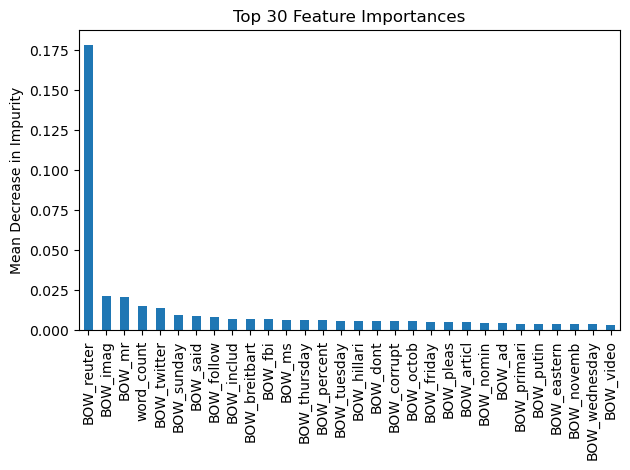

In [10]:
import matplotlib.pyplot as plt

importances = xgb_model.feature_importances_
xgb_importances = pd.Series(importances, index=X.columns)


xgb_importances_sorted = xgb_importances.sort_values(ascending=False)

# Select the top 20 features
top_20_features = xgb_importances_sorted[:30]

# Create the bar plot for the top 20 features
fig, ax = plt.subplots()
top_20_features.plot.bar(ax=ax)
ax.set_title('Top 30 Feature Importances')
ax.set_ylabel('Mean Decrease in Impurity')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability
fig.tight_layout()
plt.show()

Index(['word_count', 'avg_sentence_length', 'text_capitalization_frequency',
       'title_before_character_removal', 'text_before_character_removal',
       'subjectivity_text', 'title_sentiment', 'text_sentiment',
       'title_reading_ease', 'text_reading_ease', 'text_lexical_diversity',
       'title_lexical_diversity'],
      dtype='object')


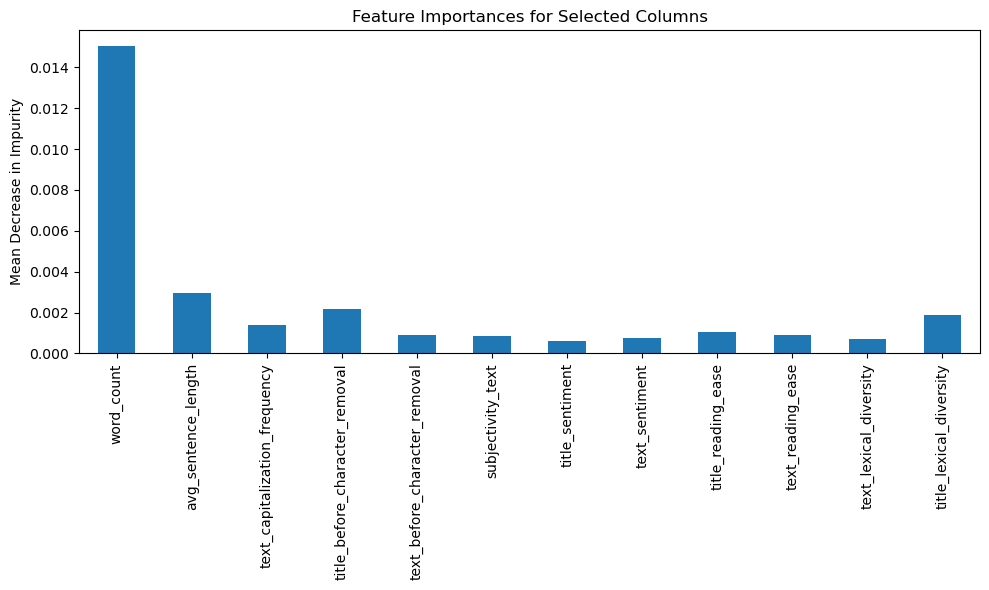

In [11]:
import matplotlib.pyplot as plt

col=X.iloc[:,:-1000].columns
print(col)

importances = xgb_model.feature_importances_
xgb_importances = pd.Series(importances, index=X.columns)

# Select the top 20 features
selected_importances = xgb_importances[col]

# Create a bar plot for the selected columns' importances
fig, ax = plt.subplots(figsize=(10, 6))
selected_importances.plot.bar(ax=ax)
ax.set_title('Feature Importances for Selected Columns')
ax.set_ylabel('Mean Decrease in Impurity')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

In [12]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(17316, 1012)
(40404, 1012)
(17316,)
(40404,)


In [21]:
from sklearn.preprocessing import StandardScaler


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)  # Use X_train_scaled if you applied feature scaling


y_pred = logistic_model.predict(X_test)  # Use X_test_scaled if you applied feature scaling

coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Coefficients: [[-6.90810156 13.59483228  7.3377947  ...  1.43549024 -0.45209052
  -0.27077134]]
Intercept: [3.62468456]
Accuracy: 0.9367059367059367
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      9880
         1.0       0.92      0.93      0.93      7436

    accuracy                           0.94     17316
   macro avg       0.93      0.94      0.94     17316
weighted avg       0.94      0.94      0.94     17316

Confusion Matrix:
[[9280  600]
 [ 496 6940]]


D:\Programs\envs\FakeNewsResearch\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['avg_sentence_length' 'text_capitalization_frequency' 'word_count'
 'text_before_character_removal' 'BOW_reuter' 'text_reading_ease'
 'title_before_character_removal' 'BOW_imag' 'BOW_octob' 'BOW_twitter'
 'BOW_breitbart' 'BOW_yearold' 'title_lexical_diversity' 'BOW_novemb'
 'BOW_ms' 'text_lexical_diversity' 'BOW_mr' 'BOW_dont' 'BOW_theyr'
 'BOW_sunday']
[13.59483228  7.3377947  -6.90810156  4.94564585 -4.8824504  -3.65655078
  2.52394487  2.35860499  1.78500783 -1.77877537 -1.48073099  1.43549024
 -1.29814965  1.26223495 -1.20546944  1.14507098 -1.12522141 -1.10173192
 -0.95244978 -0.92429172]


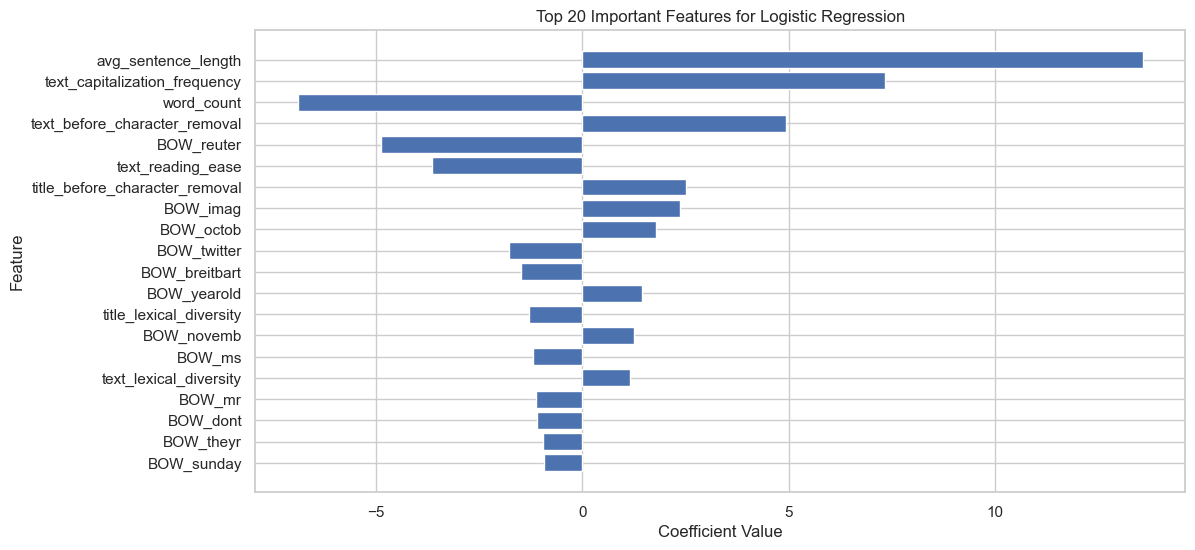

In [39]:

coefficients = logistic_model.coef_[0]

# Sort the coefficients by absolute value to find the most important features
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

# Select the top N most important features (adjust N as needed)
top_n_features = 20  # Change this to the number of top features you want to visualize

# Get the names of the top N most important features
feature_names = np.array(X.columns)  # Replace 'your_feature_names' with the actual names of your features
top_features = feature_names[sorted_indices][:top_n_features]
print(top_features)
print(coefficients[sorted_indices][:top_n_features])
# Plot the coefficients of the top N most important features
plt.figure(figsize=(12, 6))
plt.barh(range(top_n_features), coefficients[sorted_indices][:top_n_features], align='center')
plt.yticks(range(top_n_features), top_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top {} Important Features for Logistic Regression'.format(top_n_features))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()




In [19]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9202471702471703
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9880
         1.0       0.91      0.90      0.91      7436

    accuracy                           0.92     17316
   macro avg       0.92      0.92      0.92     17316
weighted avg       0.92      0.92      0.92     17316

Confusion Matrix:
[[9258  622]
 [ 759 6677]]


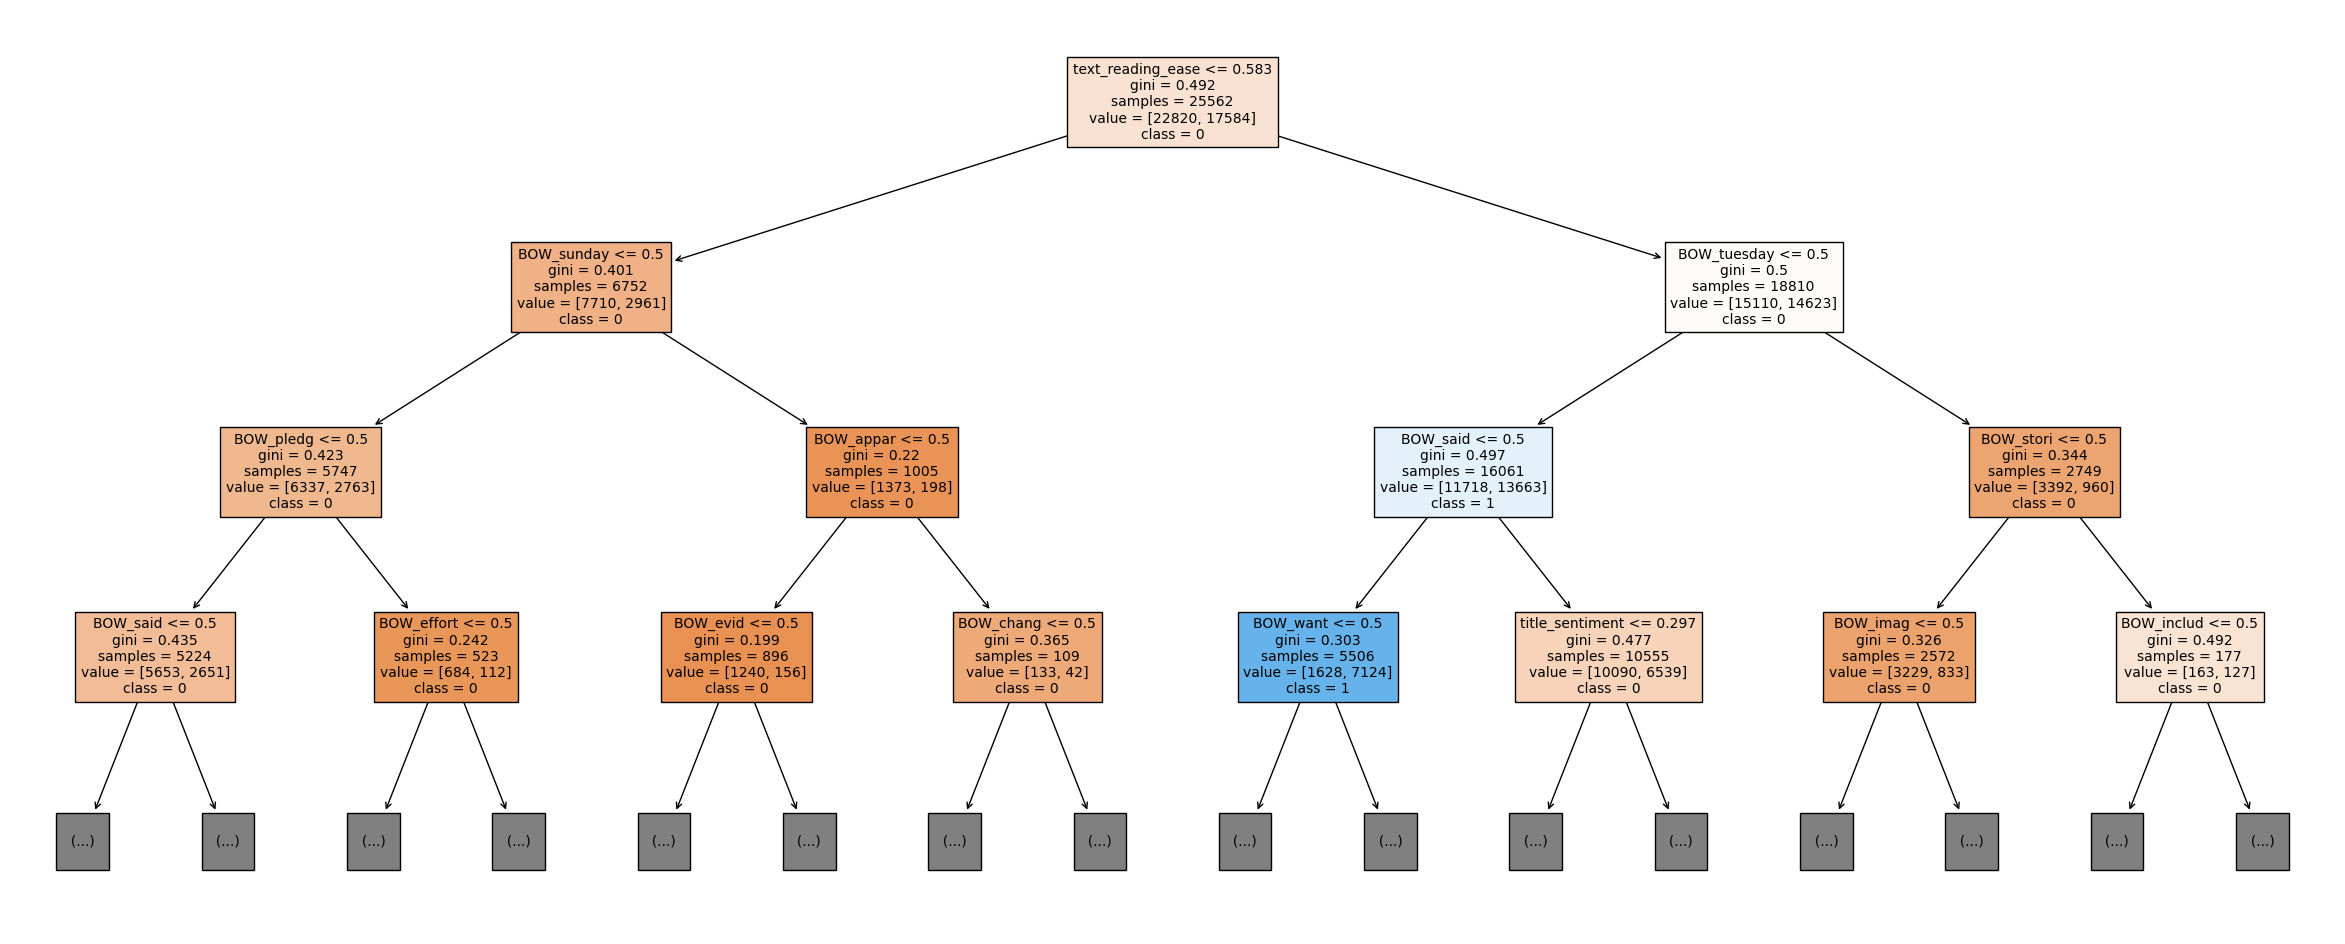

In [20]:
individual_tree = random_forest.estimators_[0]

# Visualize the selected decision tree (you can specify max_depth or other parameters)
plt.figure(figsize=(30, 12))
plot_tree(individual_tree, max_depth=3, fontsize=10, feature_names=X.columns.tolist(), 
          class_names=['0', '1'], filled=True, node_ids=False)
plt.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Create a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Epoch 1/10
632/632 [==============================] - 1s 1ms/step - loss: 0.3180 - accuracy: 0.8643
Epoch 2/10
632/632 [==============================] - 1s 1ms/step - loss: 0.1950 - accuracy: 0.9280
Epoch 3/10
632/632 [==============================] - 1s 1ms/step - loss: 0.1691 - accuracy: 0.9378
Epoch 4/10
632/632 [==============================] - 1s 2ms/step - loss: 0.1485 - accuracy: 0.9457
Epoch 5/10
632/632 [==============================] - 1s 1ms/step - loss: 0.1381 - accuracy: 0.9504
Epoch 6/10
632/632 [==============================] - 1s 1ms/step - loss: 0.1214 - accuracy: 0.9562
Epoch 7/10
632/632 [==============================] - 1s 1ms/step - loss: 0.1111 - accuracy: 0.9598
Epoch 8/10
632/632 [==============================] - 1s 1ms/step - loss: 0.1019 - accuracy: 0.9632
Epoch 9/10
632/632 [==============================] - 1s 1ms/step - loss: 0.0946 - accuracy: 0.9668
Epoch 10/10
542/542 [==============================] - 0s 687us/step
Accuracy: 0.939015939015939
   

In [16]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7797990297990298
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.79      9880
         1.0       0.71      0.82      0.76      7436

    accuracy                           0.78     17316
   macro avg       0.78      0.79      0.78     17316
weighted avg       0.79      0.78      0.78     17316

Confusion Matrix:
[[7389 2491]
 [1322 6114]]


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8882536382536382
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      9880
         1.0       0.87      0.87      0.87      7436

    accuracy                           0.89     17316
   macro avg       0.89      0.89      0.89     17316
weighted avg       0.89      0.89      0.89     17316

Confusion Matrix:
[[8936  944]
 [ 991 6445]]


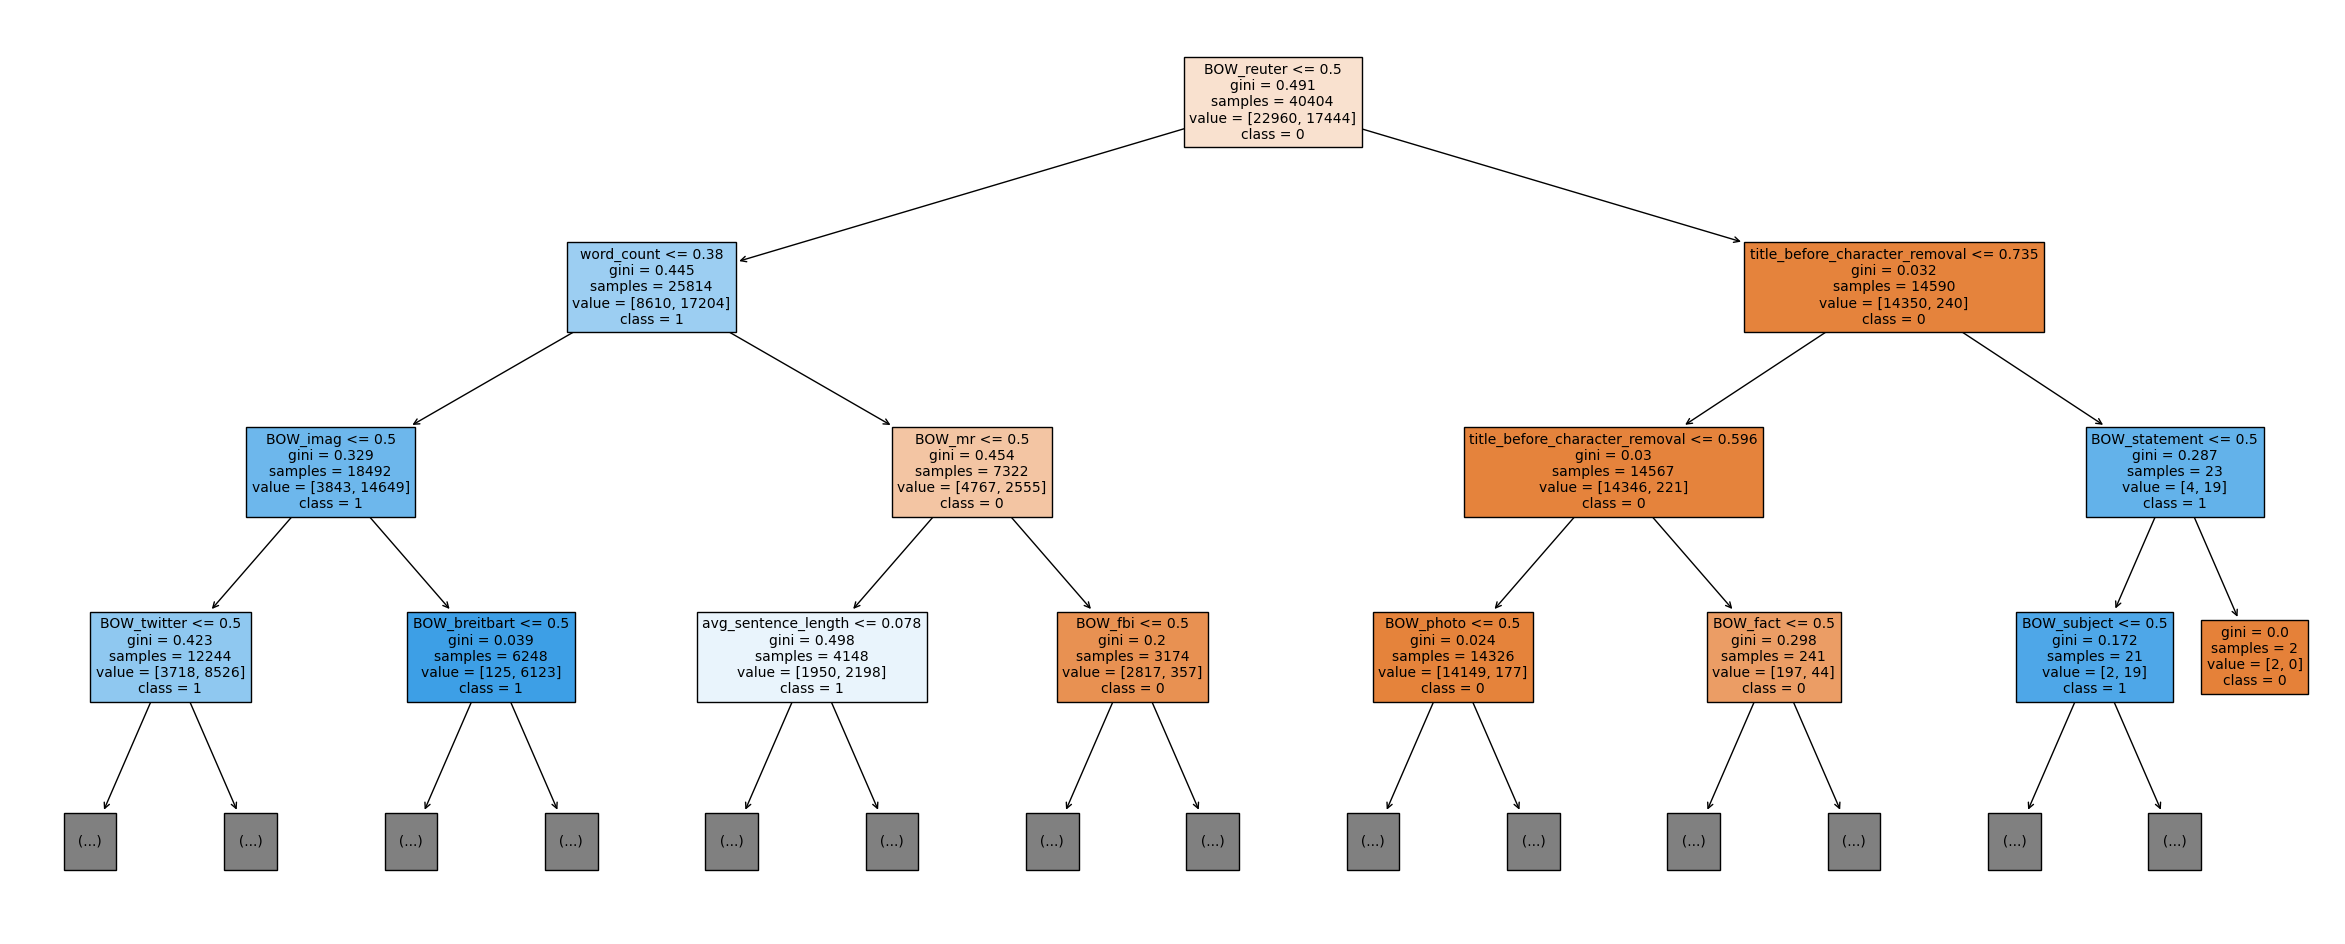

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Increase max_depth to display a deeper tree
plt.figure(figsize=(30, 12))
plot_tree(dt_model, max_depth=3, fontsize=10, feature_names=X.columns.tolist(), 
          class_names=['0', '1'], filled=True, node_ids=False)
plt.show()
